In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LinearRegression

# Bootstrap and confidence interval

In [2]:
df=pd.read_csv('hockey_draftees_2005.csv')

## Bootstrap on parameters

In [3]:
# Write a Bootstrap function that records the fitted models 
def BootstrapCoef(data, numboot):
    # Write the function here
    n = len(data)
    theta = np.zeros((numboot,3))
    for i in range(numboot):
        new_df =  data.sample(n, replace=True)

        x = new_df['wt']
        X = np.c_[x, x**2]
        y = new_df['overall']

        reg = LinearRegression().fit(X, y)
        intercept = reg.intercept_
        coef = reg.coef_
        theta[i][0] = intercept
        theta[i][1] = coef[0]
        theta[i][2] = coef[1]

    return theta

params = BootstrapCoef(df,100)

## Boostrap on fit

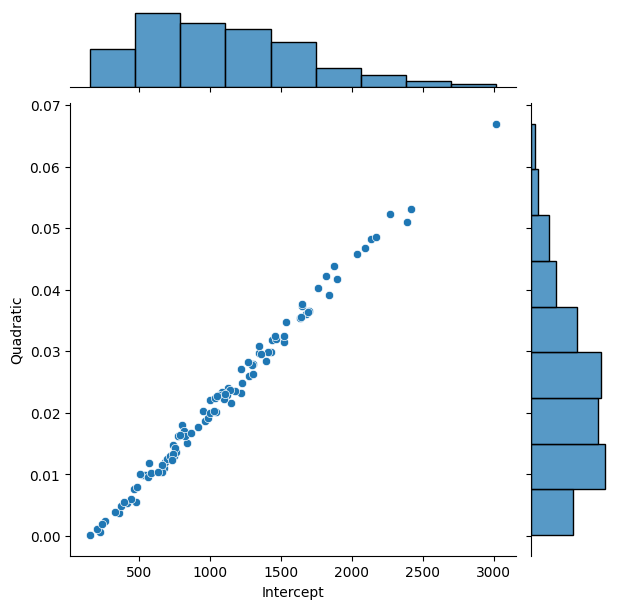

In [4]:
ax = sns.jointplot(x=params[:,0],y=params[:,2])
ax.ax_joint.set_xlabel('Intercept')
ax.ax_joint.set_ylabel('Quadratic')
plt.show()

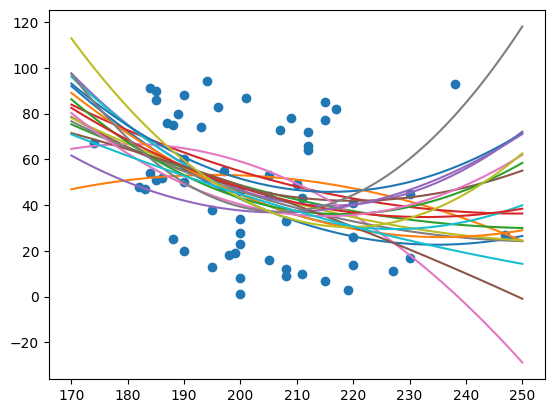

In [5]:
# Write a Bootstrap function that records the fitted models 
def BootstrapPred(data,xp):
    numboot = 20
    n = len(data)
    
    X_pred = np.c_[xp, xp**2]
    y_pred = np.zeros((numboot,X_pred.shape[0]))   
    for i in range(numboot):
        new_df =  data.sample(len(data), replace=True)
        x = new_df['wt']
        X = np.c_[x, x**2]
        y = new_df['overall']
        reg = LinearRegression().fit(X, y)

        y_pred[i,:] = reg.predict(X_pred)

    return y_pred


# Get predictions from 20 bootstrapped models 
x_grid = np.linspace(170, 250, 100)
y_pred = BootstrapPred(df, x_grid)

# Make a scatterplot and draw the 20 lines  
for i in range(20):
    plt.plot(x_grid, y_pred[i,:])
plt.scatter(df['wt'], df['overall'])
plt.show()

## Confidence interval (Noral Distribution)

In [8]:
# Calculate bootstrap interval
boot_ci = [np.quantile(params[:,2], 0.025, axis=0) ,
        np.quantile(params[:,2], 0.975, axis=0)]

print(boot_ci)

[0.0015334929461903004, 0.051725739627597855]


## Confidence interval (Central limit theorem)

Compute (and print) a 95% confidence interval for the average test error using the Central Limit Theorem. You can use the following formula to compute it: 

$$ \bar{L_n} \pm 1.96 * \frac{\sigma_{l}}{\sqrt{n}}$$

Here $\bar{L_n}$ is the average test loss (i.e. for our test set), $\sigma_l$ is the standard deviation (of our test losses), and $n$ is the total number of test losses we compute. 

In [7]:
def confidence_interval(ypred, ytest):
    loss = ypred - ytest

    lossMean = np.mean((ypred - ytest)**2)

    # Calculate the 95% Confidence Interval for average test loss

    stdErr = np.std(loss, ddof=1)/np.sqrt(len(loss))

    ci = [lossMean - 1.96 * stdErr, lossMean + 1.96 * stdErr]

    print('Confidence Interval is:', ci)

## Confidence interval (t distribution)
t-distribution , which is more accurate for small sample sizes.  

The $100(1-\alpha)\%$ confidence interval is 


$$ \bar{x} \pm  t_{1-\alpha/2, n-1} \dfrac{\hat{\sigma}}{\sqrt{n}} $$

Where $ t_{1-\alpha/2, n-1}$ is the appropiorate quantile of a Student's t distribution with $n-1$ degrees of freedom.  
Write a function called `confidence_interval` which takes as it's argument an array of data called `data` and returns two things:

* An estimated mean of `data`, and 

* The lower and upper bounds of the 95% confidence interval for the mean of `data`.  Ensure these are returned in a numpy array of shape (2,)

In [ ]:
from scipy.stats import t
def confidence_interval(data):
    # Note, np.std divides by n and not n-1
    # Force it to apply the correct formula by ussing ddof=1
    # Alternatively, you can use scipy.stats.sem to compute
    # The standard error
    mean = np.mean(data)
    std = np.std(data, ddof = 1)
    confidence = 0.95
    t_crit = np.abs(t.ppf((1-confidence)/2, len(data) - 1))
    bounds = (mean - std * t_crit / np.sqrt(len(data)), 
                mean + std *t_crit / np.sqrt(len(data))) 
    
    return mean, bounds